In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as scipy_stats
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings('ignore')

# Load BASELINE datasets
df_baseline_api_gateway = pd.read_csv("baseline/retrans_packets/api_gateway.csv")
df_baseline_customers_service = pd.read_csv("baseline/retrans_packets/customers_service.csv")
df_baseline_vets_service = pd.read_csv("baseline/retrans_packets/vets_service.csv")
df_baseline_visits_service = pd.read_csv("baseline/retrans_packets/visits_service.csv")
df_baseline_srtt = pd.read_csv("baseline/srtt.csv")

# Load CPU STRESS datasets
df_cpustress_api_gateway = pd.read_csv("cpu stress/retrans_packets/api_gateway.csv")
df_cpustress_customers_service = pd.read_csv("cpu stress/retrans_packets/customers_service.csv")
df_cpustress_vets_service = pd.read_csv("cpu stress/retrans_packets/vets_service.csv")
df_cpustress_visits_service = pd.read_csv("cpu stress/retrans_packets/visits_service.csv")
df_cpustress_srtt = pd.read_csv("cpu stress/srtt.csv")

# Load DELAY datasets
df_delay_api_gateway = pd.read_csv("delay/retrans_packets/api_gateway.csv")
df_delay_customers_service = pd.read_csv("delay/retrans_packets/customers_service.csv")
df_delay_vets_service = pd.read_csv("delay/retrans_packets/vets_service.csv")
df_delay_visits_service = pd.read_csv("delay/retrans_packets/visits_service.csv")
df_delay_srtt = pd.read_csv("delay/srtt.csv")

# Load MEM STRESS datasets
df_memstress_api_gateway = pd.read_csv("mem stress/retrans_packets/api_gateway.csv")
df_memstress_customers_service = pd.read_csv("mem stress/retrans_packets/customers_service.csv")
df_memstress_vets_service = pd.read_csv("mem stress/retrans_packets/vets_service.csv")
df_memstress_visits_service = pd.read_csv("mem stress/retrans_packets/visits_service.csv")
df_memstress_srtt = pd.read_csv("mem stress/srtt.csv")

# Load NET LOSS datasets
df_netloss_api_gateway = pd.read_csv("net loss/retrans_packets/api_gateway.csv")
df_netloss_customers_service = pd.read_csv("net loss/retrans_packets/customers_service.csv")
df_netloss_vets_service = pd.read_csv("net loss/retrans_packets/vets_service.csv")
df_netloss_visits_service = pd.read_csv("net loss/retrans_packets/visits_service.csv")
df_netloss_srtt = pd.read_csv("net loss/srtt.csv")


# Add source labels - BASELINE
df_baseline_api_gateway["source"] = "BASELINE"
df_baseline_customers_service["source"] = "BASELINE"
df_baseline_vets_service["source"] = "BASELINE"
df_baseline_visits_service["source"] = "BASELINE"
df_baseline_srtt["source"] = "BASELINE"

# Add source labels - CPU STRESS
df_cpustress_api_gateway["source"] = "CPU_STRESS"
df_cpustress_customers_service["source"] = "CPU_STRESS"
df_cpustress_vets_service["source"] = "CPU_STRESS"
df_cpustress_visits_service["source"] = "CPU_STRESS"
df_cpustress_srtt["source"] = "CPU_STRESS"

# Add source labels - DELAY
df_delay_api_gateway["source"] = "DELAY"
df_delay_customers_service["source"] = "DELAY"
df_delay_vets_service["source"] = "DELAY"
df_delay_visits_service["source"] = "DELAY"
df_delay_srtt["source"] = "DELAY"

# Add source labels - MEM STRESS
df_memstress_api_gateway["source"] = "MEM_STRESS"
df_memstress_customers_service["source"] = "MEM_STRESS"
df_memstress_vets_service["source"] = "MEM_STRESS"
df_memstress_visits_service["source"] = "MEM_STRESS"
df_memstress_srtt["source"] = "MEM_STRESS"

# Add source labels - NET LOSS
df_netloss_api_gateway["source"] = "NET_LOSS"
df_netloss_customers_service["source"] = "NET_LOSS"
df_netloss_vets_service["source"] = "NET_LOSS"
df_netloss_visits_service["source"] = "NET_LOSS"
df_netloss_srtt["source"] = "NET_LOSS"


# Convert to datetime - BASELINE
df_baseline_api_gateway["Time"] = pd.to_datetime(df_baseline_api_gateway["Time"])
df_baseline_customers_service["Time"] = pd.to_datetime(df_baseline_customers_service["Time"])
df_baseline_vets_service["Time"] = pd.to_datetime(df_baseline_vets_service["Time"])
df_baseline_visits_service["Time"] = pd.to_datetime(df_baseline_visits_service["Time"])
df_baseline_srtt["Time"] = pd.to_datetime(df_baseline_srtt["Time"])

# Convert to datetime - CPU STRESS
df_cpustress_api_gateway["Time"] = pd.to_datetime(df_cpustress_api_gateway["Time"])
df_cpustress_customers_service["Time"] = pd.to_datetime(df_cpustress_customers_service["Time"])
df_cpustress_vets_service["Time"] = pd.to_datetime(df_cpustress_vets_service["Time"])
df_cpustress_visits_service["Time"] = pd.to_datetime(df_cpustress_visits_service["Time"])
df_cpustress_srtt["Time"] = pd.to_datetime(df_cpustress_srtt["Time"])

# Convert to datetime - DELAY
df_delay_api_gateway["Time"] = pd.to_datetime(df_delay_api_gateway["Time"])
df_delay_customers_service["Time"] = pd.to_datetime(df_delay_customers_service["Time"])
df_delay_vets_service["Time"] = pd.to_datetime(df_delay_vets_service["Time"])
df_delay_visits_service["Time"] = pd.to_datetime(df_delay_visits_service["Time"])
df_delay_srtt["Time"] = pd.to_datetime(df_delay_srtt["Time"])

# Convert to datetime - MEM STRESS
df_memstress_api_gateway["Time"] = pd.to_datetime(df_memstress_api_gateway["Time"])
df_memstress_customers_service["Time"] = pd.to_datetime(df_memstress_customers_service["Time"])
df_memstress_vets_service["Time"] = pd.to_datetime(df_memstress_vets_service["Time"])
df_memstress_visits_service["Time"] = pd.to_datetime(df_memstress_visits_service["Time"])
df_memstress_srtt["Time"] = pd.to_datetime(df_memstress_srtt["Time"])

# Convert to datetime - NET LOSS
df_netloss_api_gateway["Time"] = pd.to_datetime(df_netloss_api_gateway["Time"])
df_netloss_customers_service["Time"] = pd.to_datetime(df_netloss_customers_service["Time"])
df_netloss_vets_service["Time"] = pd.to_datetime(df_netloss_vets_service["Time"])
df_netloss_visits_service["Time"] = pd.to_datetime(df_netloss_visits_service["Time"])
df_netloss_srtt["Time"] = pd.to_datetime(df_netloss_srtt["Time"])


delay = 30
duration = 50

# Synchronize all datasets with baseline timeline
time_offset = df_baseline_api_gateway["Time"].min()

# Synchronize CPU STRESS datasets
cpustress_offset = time_offset - df_cpustress_api_gateway["Time"].min()
df_cpustress_api_gateway["Time"] += cpustress_offset
df_cpustress_customers_service["Time"] += cpustress_offset
df_cpustress_vets_service["Time"] += cpustress_offset
df_cpustress_visits_service["Time"] += cpustress_offset
df_cpustress_srtt["Time"] += cpustress_offset

# Synchronize DELAY datasets
delay_offset = time_offset - df_delay_api_gateway["Time"].min()
df_delay_api_gateway["Time"] += delay_offset
df_delay_customers_service["Time"] += delay_offset
df_delay_vets_service["Time"] += delay_offset
df_delay_visits_service["Time"] += delay_offset
df_delay_srtt["Time"] += delay_offset

# Synchronize MEM STRESS datasets
memstress_offset = time_offset - df_memstress_api_gateway["Time"].min()
df_memstress_api_gateway["Time"] += memstress_offset
df_memstress_customers_service["Time"] += memstress_offset
df_memstress_vets_service["Time"] += memstress_offset
df_memstress_visits_service["Time"] += memstress_offset
df_memstress_srtt["Time"] += memstress_offset

# Synchronize NET LOSS datasets
netloss_offset = time_offset - df_netloss_api_gateway["Time"].min()
df_netloss_api_gateway["Time"] += netloss_offset
df_netloss_customers_service["Time"] += netloss_offset
df_netloss_vets_service["Time"] += netloss_offset
df_netloss_visits_service["Time"] += netloss_offset
df_netloss_srtt["Time"] += netloss_offset


# Convert timeline to minutes for ALL datasets
all_dfs = [
    # Baseline
    df_baseline_api_gateway, df_baseline_customers_service, df_baseline_vets_service, 
    df_baseline_visits_service, df_baseline_srtt,
    # CPU Stress
    df_cpustress_api_gateway, df_cpustress_customers_service, df_cpustress_vets_service, 
    df_cpustress_visits_service, df_cpustress_srtt,
    # Delay
    df_delay_api_gateway, df_delay_customers_service, df_delay_vets_service, 
    df_delay_visits_service, df_delay_srtt,
    # Memory Stress
    df_memstress_api_gateway, df_memstress_customers_service, df_memstress_vets_service, 
    df_memstress_visits_service, df_memstress_srtt,
    # Network Loss
    df_netloss_api_gateway, df_netloss_customers_service, df_netloss_vets_service, 
    df_netloss_visits_service, df_netloss_srtt
]

for df in all_dfs:
    df["Minutes"] = (df["Time"] - df["Time"].min()).dt.total_seconds() / 60

# COMPLETE DATASETS DICTIONARY 
all_datasets = {
    'ApiGateway': {
        'baseline': df_baseline_api_gateway,
        'cpu_stress': df_cpustress_api_gateway,
        'delay': df_delay_api_gateway,
        'mem_stress': df_memstress_api_gateway,
        'net_loss': df_netloss_api_gateway,
    },
    'CustomersService': {
        'baseline': df_baseline_customers_service,
        'cpu_stress': df_cpustress_customers_service,
        'delay': df_delay_customers_service,
        'mem_stress': df_memstress_customers_service,
        'net_loss': df_netloss_customers_service,
    },
    'VetsService': {
        'baseline': df_baseline_vets_service,
        'cpu_stress': df_cpustress_vets_service,
        'delay': df_delay_vets_service,
        'mem_stress': df_memstress_vets_service,
        'net_loss': df_netloss_vets_service,
    },
    'VisitsService': {
        'baseline': df_baseline_visits_service,
        'cpu_stress': df_cpustress_visits_service,
        'delay': df_delay_visits_service,
        'mem_stress': df_memstress_visits_service,
        'net_loss': df_netloss_visits_service,
    },
    'SRTT': {
        'baseline': df_baseline_srtt,
        'cpu_stress': df_cpustress_srtt,
        'delay': df_delay_srtt,
        'mem_stress': df_memstress_srtt,
        'net_loss': df_netloss_srtt,
    }
}

print("✅ All TCP retransmission datasets loaded successfully!")
print(f"📊 Loaded {len(all_datasets)} TCP metrics across {len(all_datasets['ApiGateway'])} experiment types")
print("\nDataset structure:")
for metric, experiments in all_datasets.items():
    print(f"  {metric}: {list(experiments.keys())}")

✅ All TCP retransmission datasets loaded successfully!
📊 Loaded 5 TCP metrics across 5 experiment types

Dataset structure:
  ApiGateway: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  CustomersService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  VetsService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  VisitsService: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']
  SRTT: ['baseline', 'cpu_stress', 'delay', 'mem_stress', 'net_loss']


Running TUNA analysis on TCP datasets...
Processing ApiGateway
Training ApiGateway...
  ✓ Applied ML + penalty (factor: 0.75) for ApiGateway - baseline
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - cpu_stress (discrete data)
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - delay (discrete data)
  ℹ Applied penalty-only (factor: 0.75) for ApiGateway - mem_stress (discrete data)
  ✓ Applied ML + penalty (factor: 0.75) for ApiGateway - net_loss
Processing CustomersService
Training CustomersService...
  ✓ Applied ML + penalty (factor: 0.75) for CustomersService - baseline
  ℹ Applied penalty-only (factor: 0.75) for CustomersService - cpu_stress (discrete data)
  ✓ Applied ML + penalty (factor: 0.75) for CustomersService - delay
  ℹ Applied penalty-only (factor: 0.75) for CustomersService - mem_stress (discrete data)
  ✓ Applied ML + penalty (factor: 0.75) for CustomersService - net_loss
Processing VetsService
Training VetsService...
  ℹ Applied penalty-only (factor: 0.75

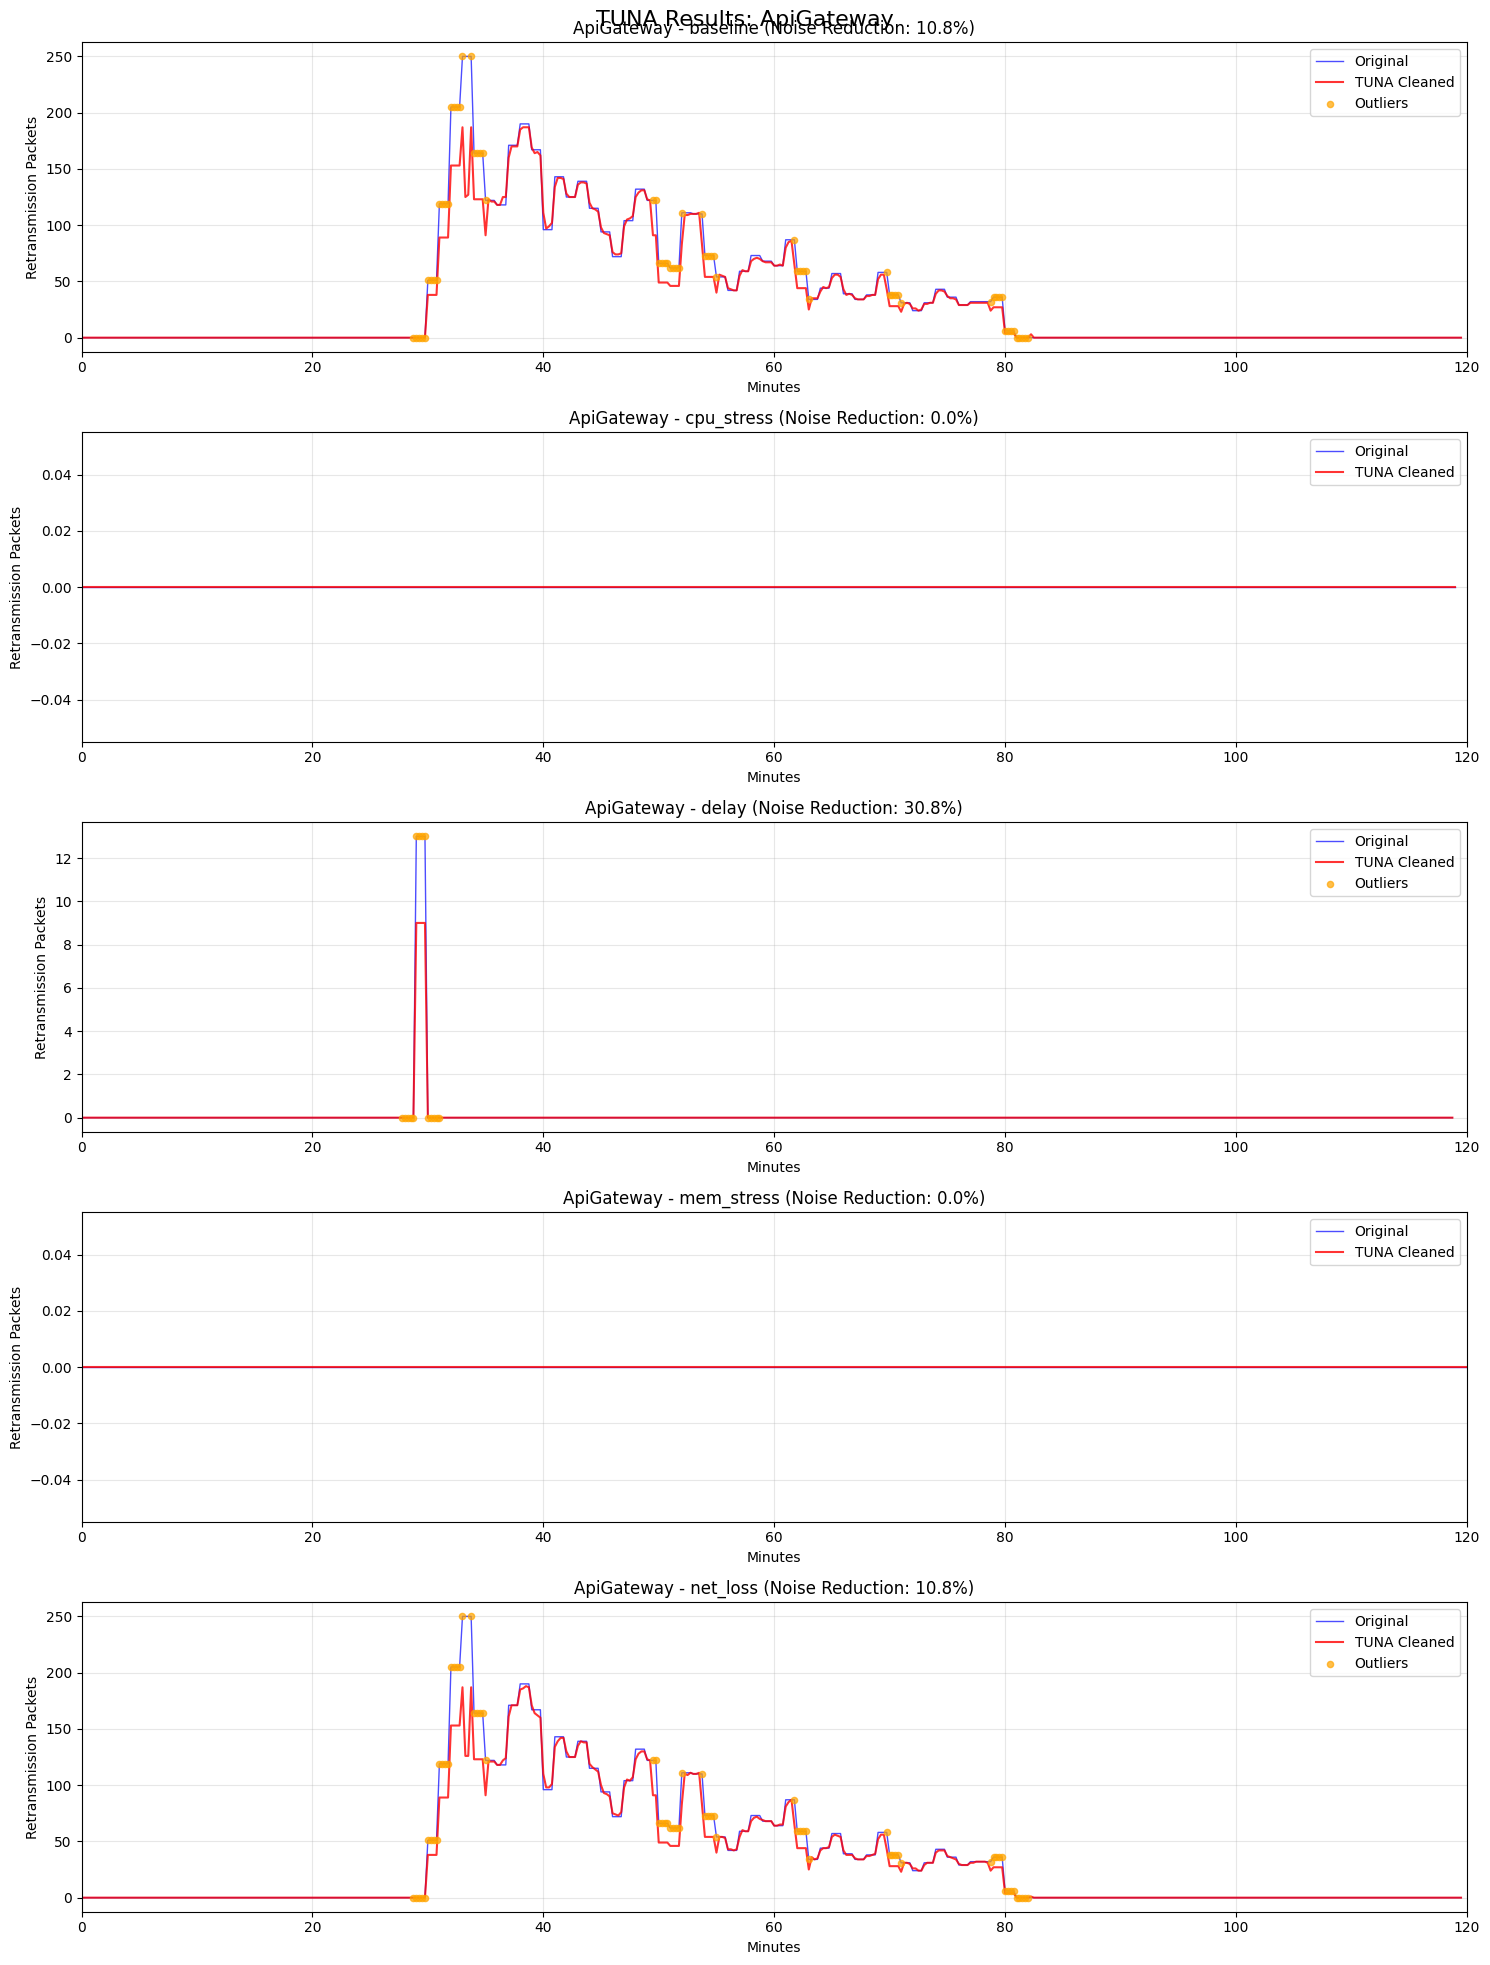

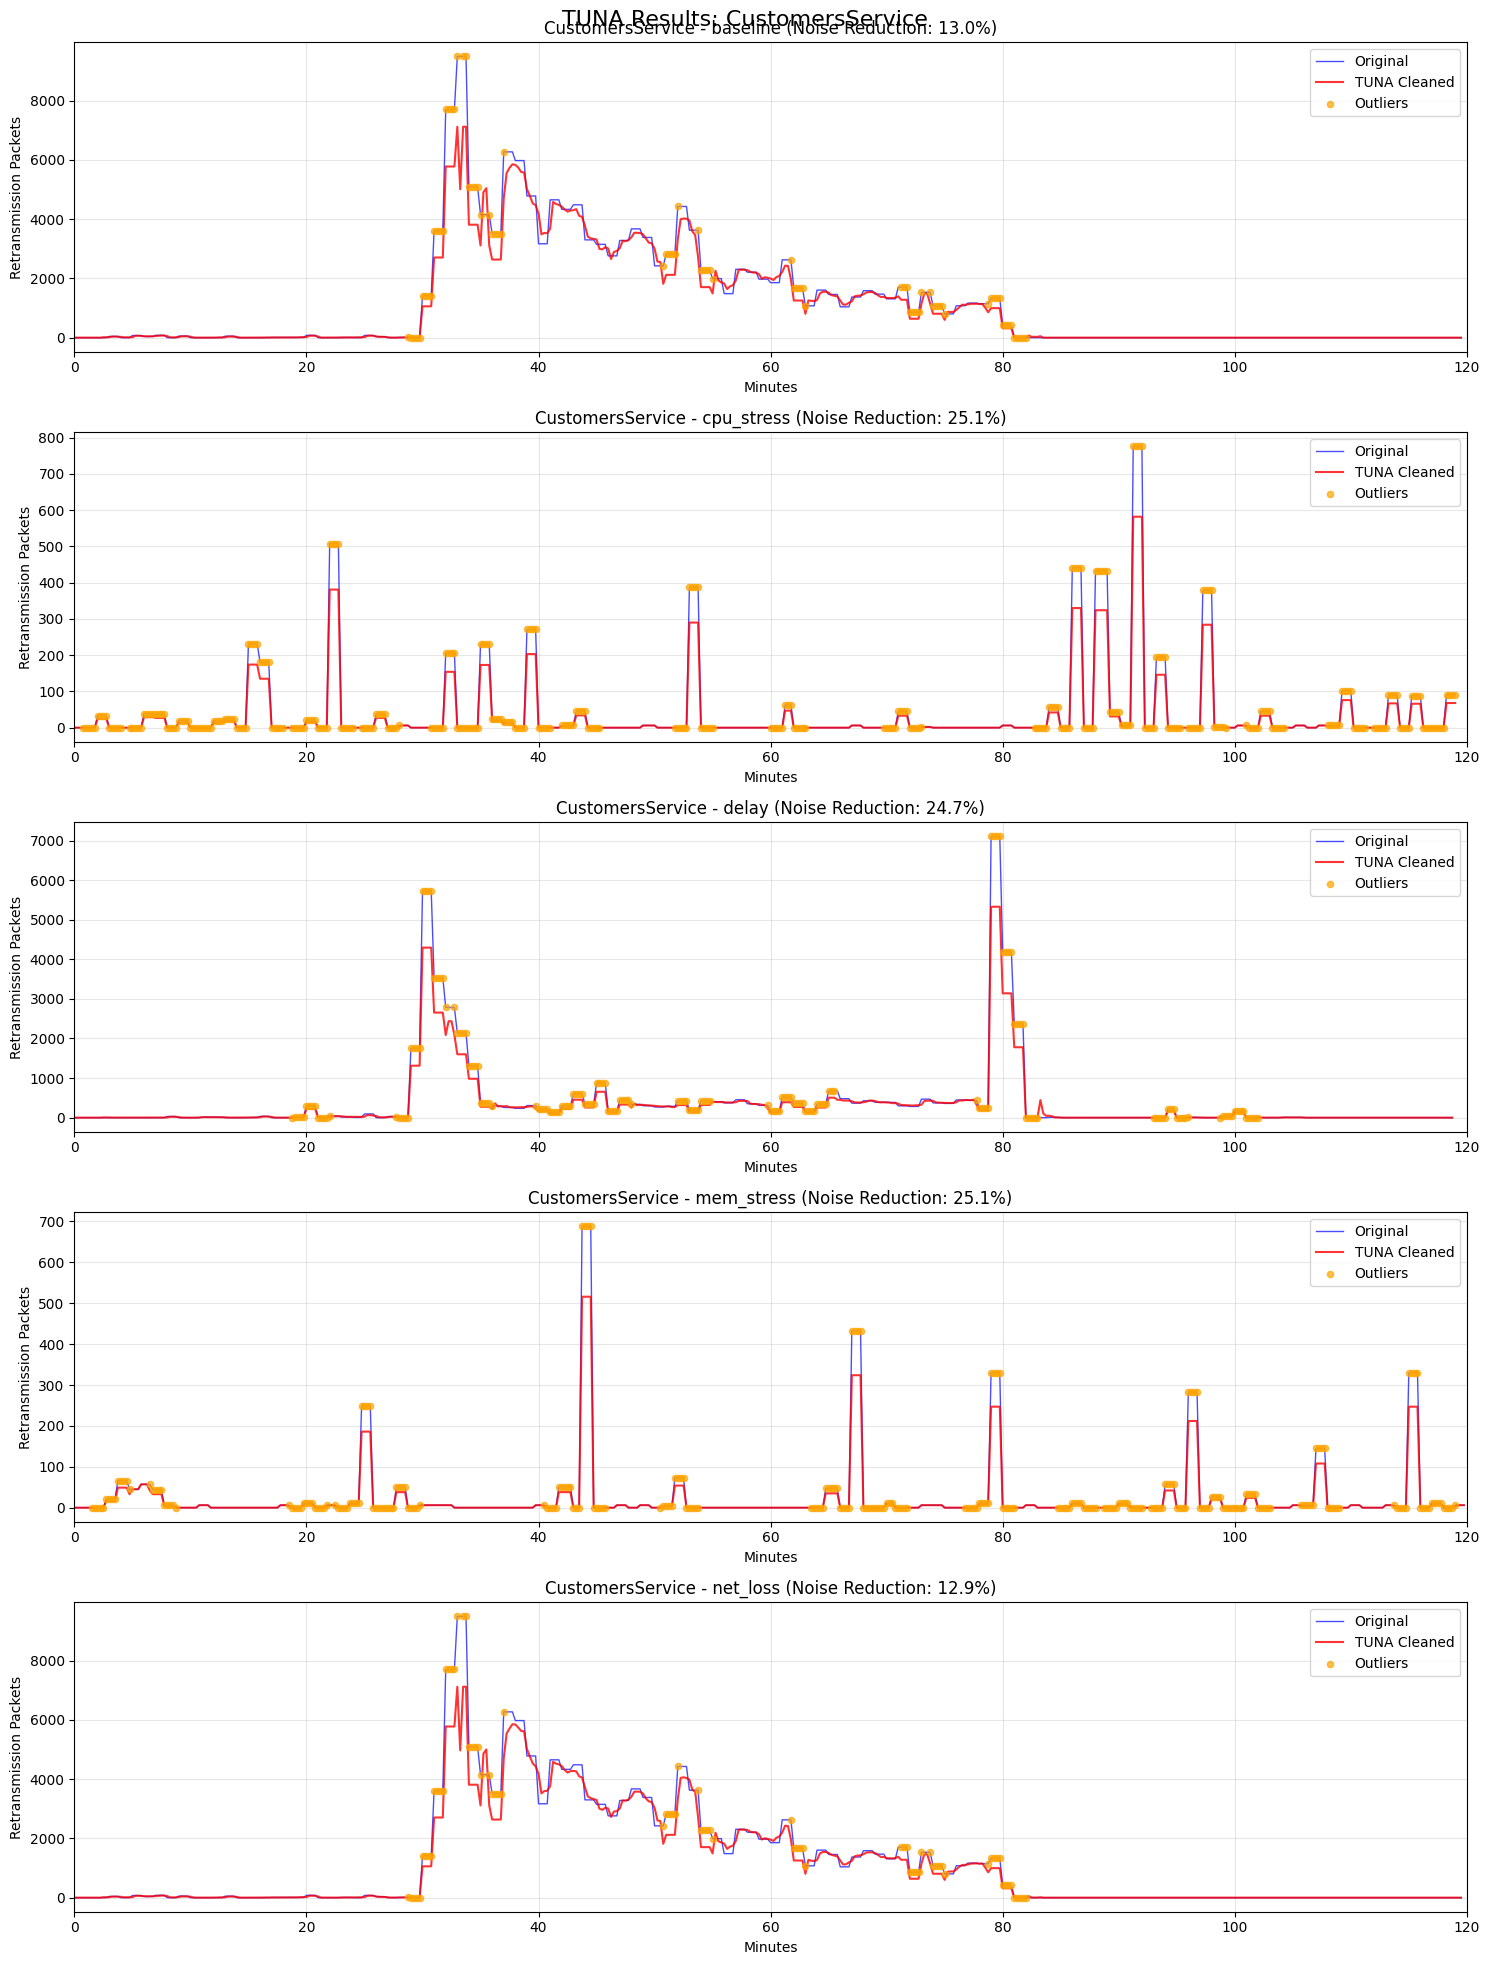

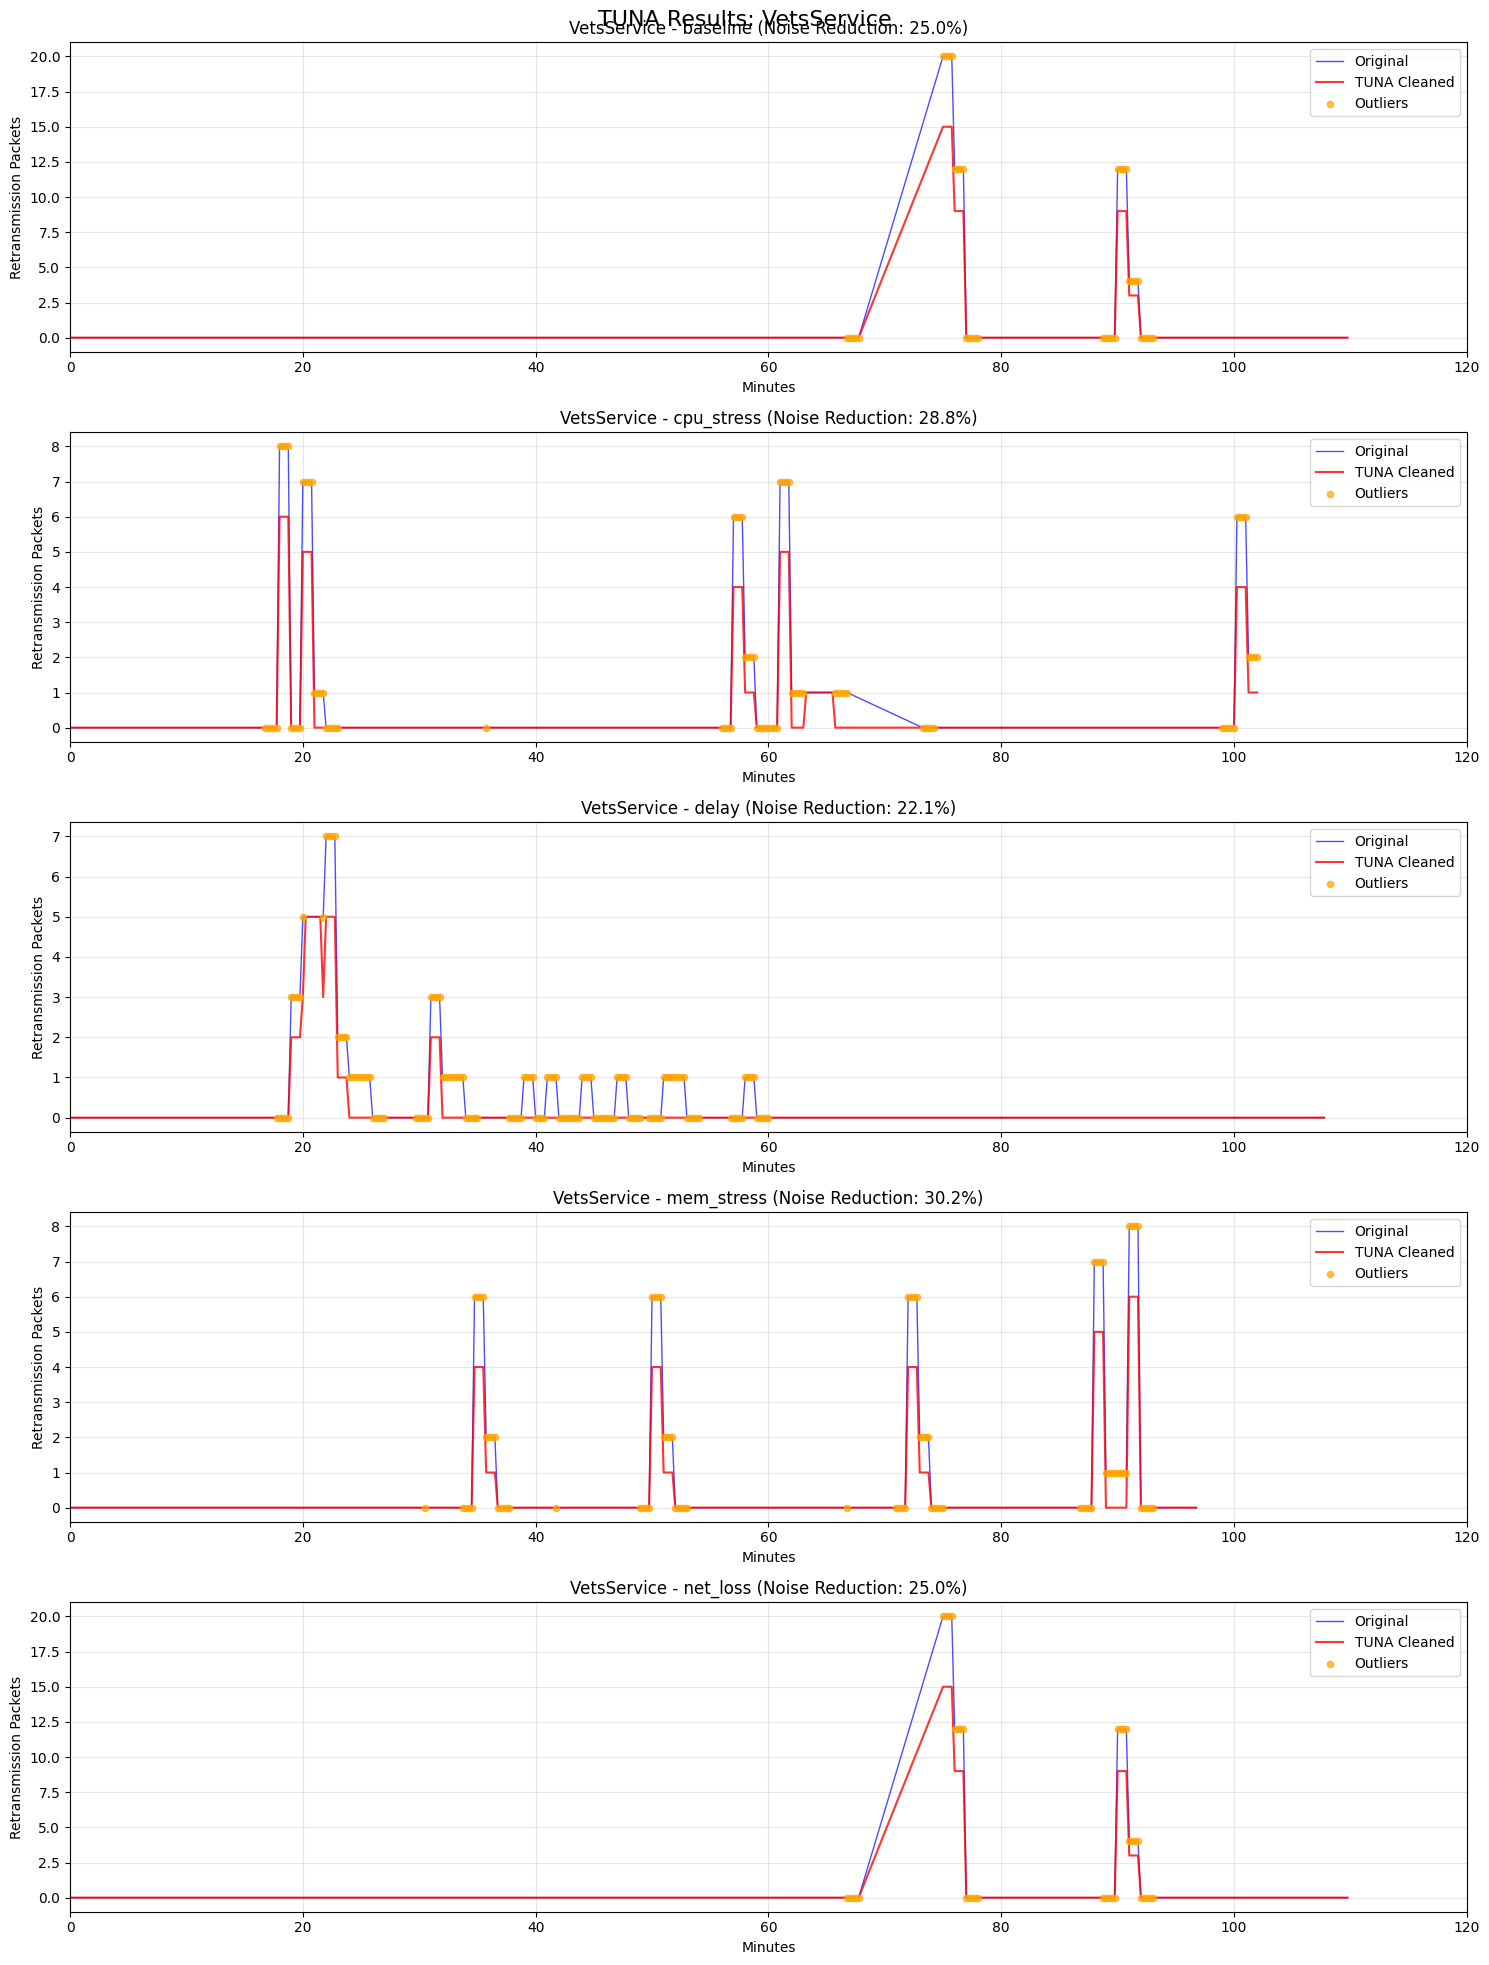

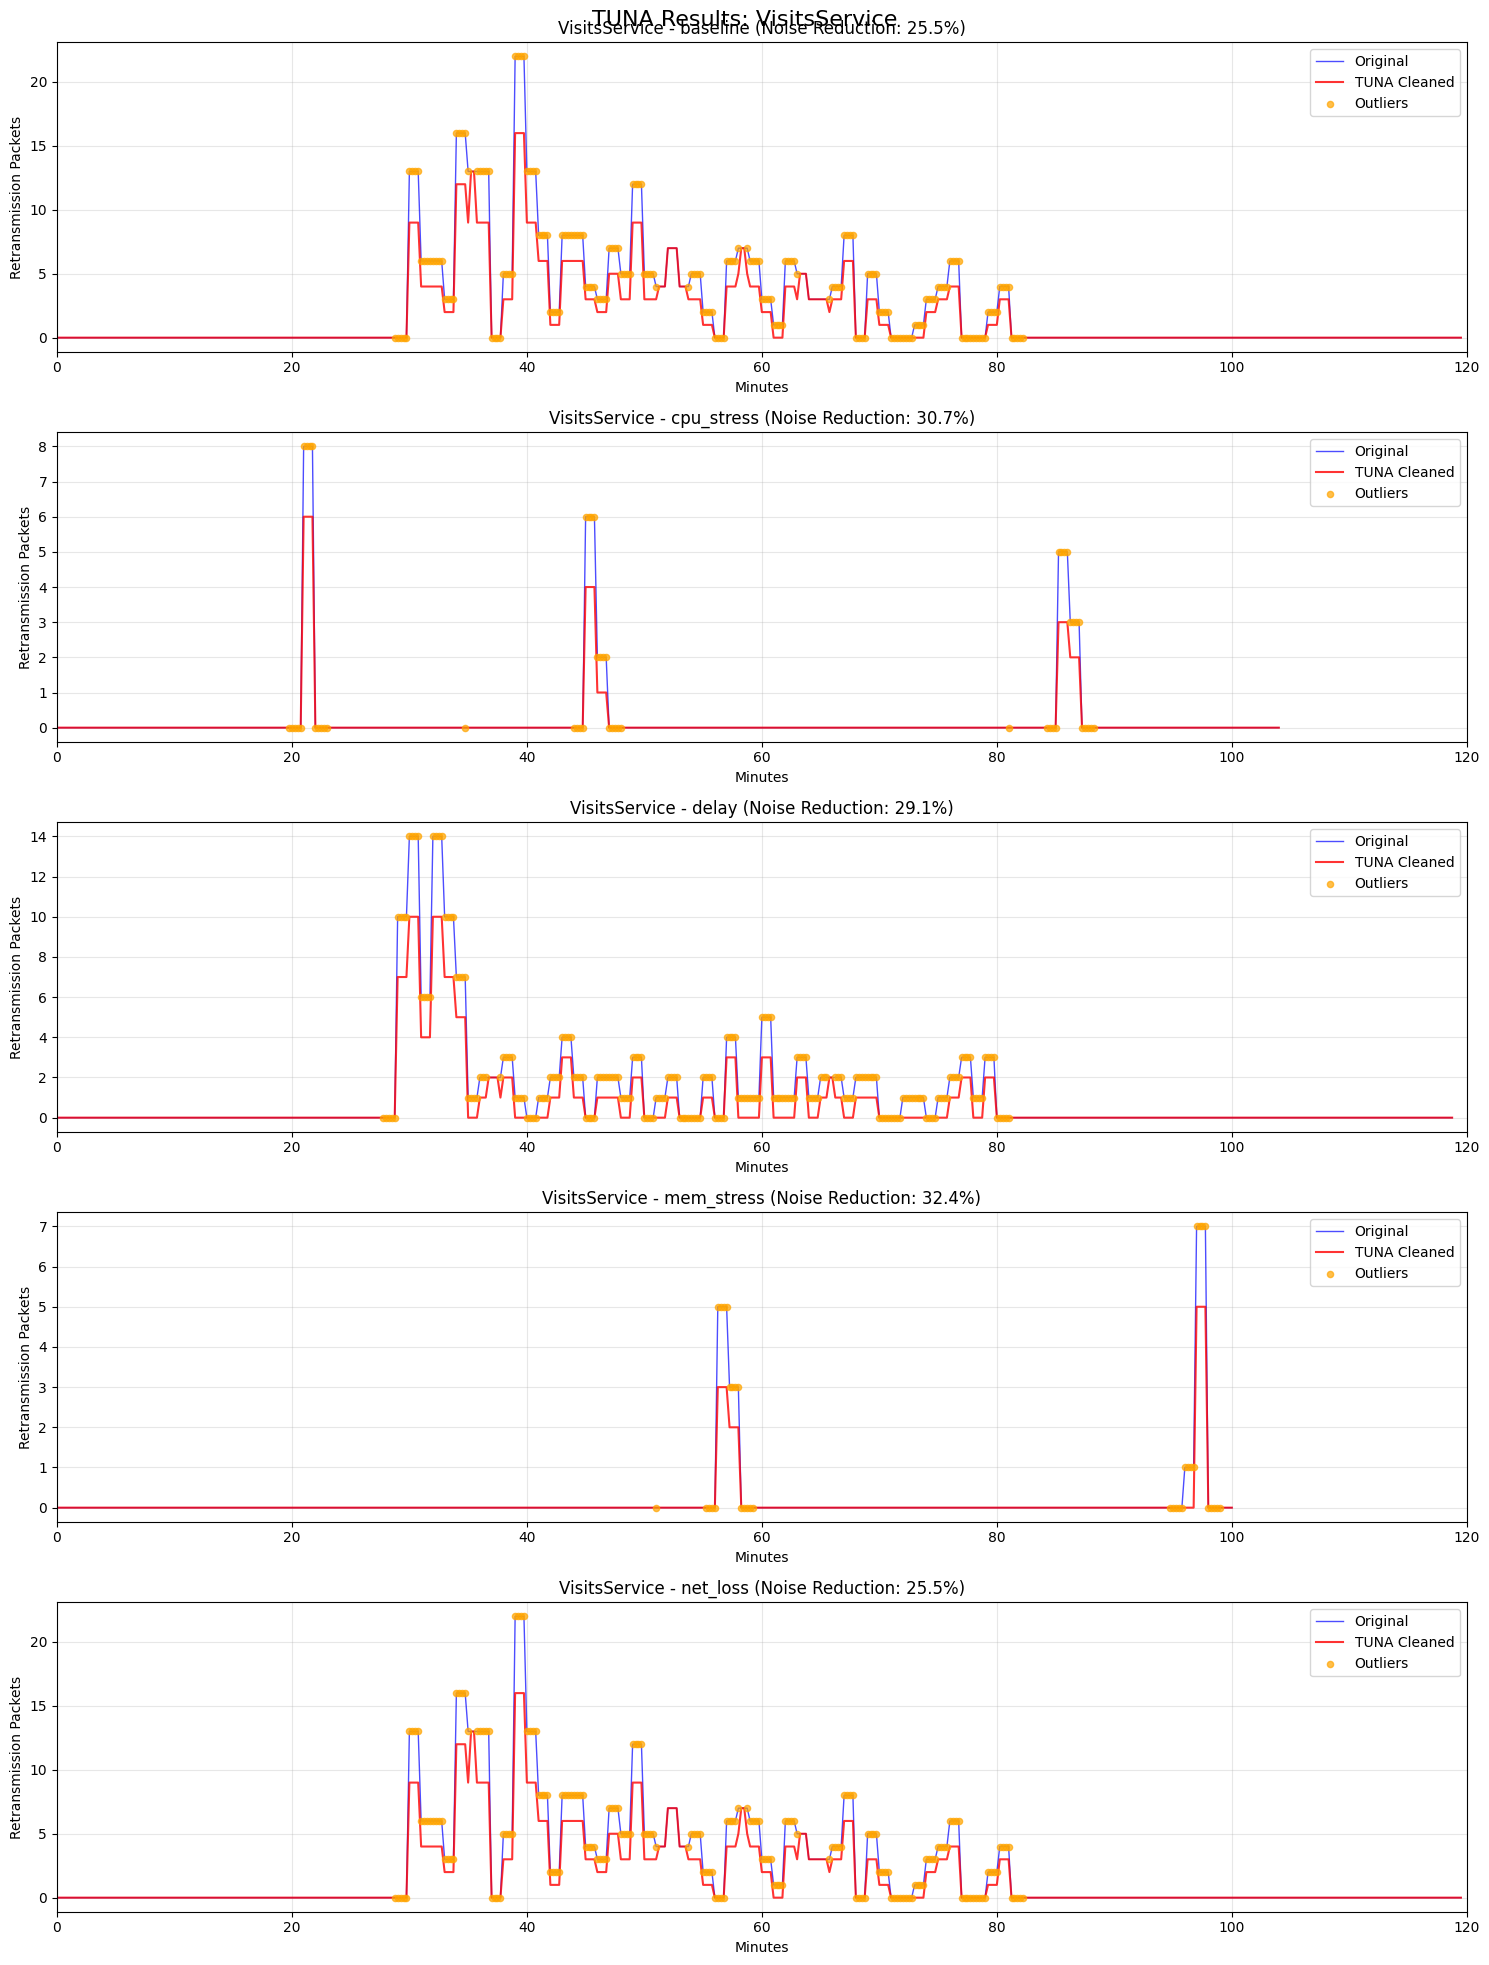

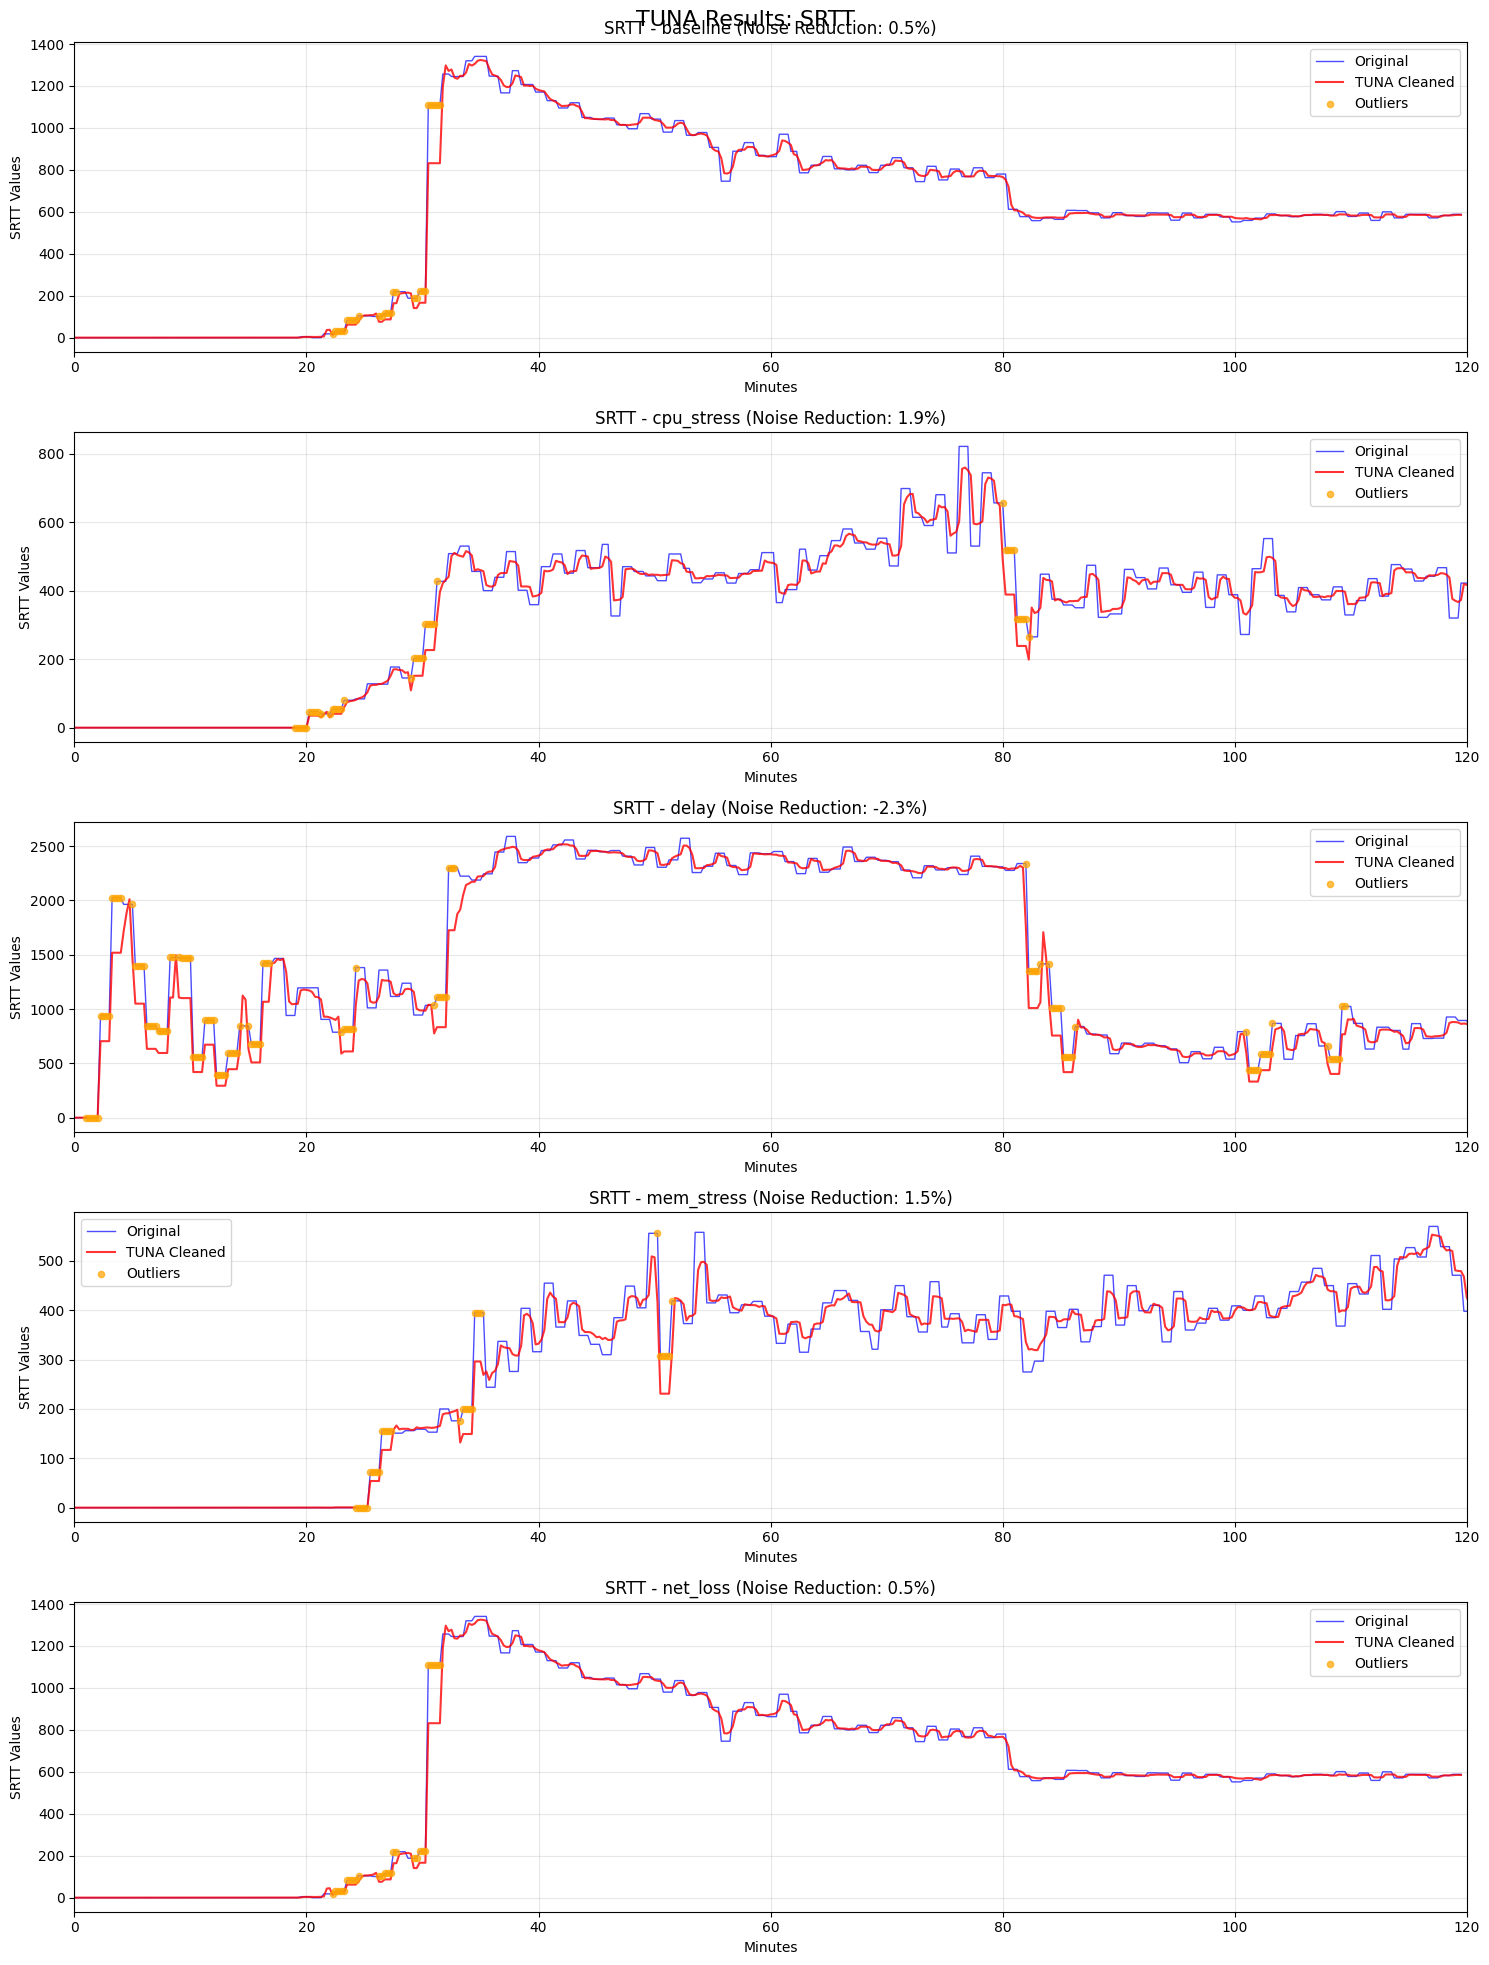


TCP TUNA Results Summary:
Metric          Experiment   Outliers   Noise Red%   Correlation 
------------------------------------------------------------
ApiGateway      baseline     67               10.8%       0.979
ApiGateway      cpu_stress   0                 0.0%         nan
ApiGateway      delay        14               30.8%       1.000
ApiGateway      mem_stress   0                 0.0%         nan
ApiGateway      net_loss     67               10.8%       0.980
CustomersService baseline     77               13.0%       0.980
CustomersService cpu_stress   323              25.1%       1.000
CustomersService delay        165              24.7%       0.998
CustomersService mem_stress   262              25.1%       1.000
CustomersService net_loss     77               12.9%       0.980
VetsService     baseline     36               25.0%       1.000
VetsService     cpu_stress   79               28.8%       0.989
VetsService     delay        132              22.1%       0.939
VetsServi

In [24]:
def extract_tcp_values(df, metric_name):
    """Extract TCP values from datasets (handles both single and multi-column data)"""
    exclude_cols = ['Time', 'Minutes', 'source']
    
    # For TCP metrics, check if we have single or multiple value columns
    value_cols = [col for col in df.columns if col not in exclude_cols]
    
    if len(value_cols) == 1:
        # Single column (like individual service retransmission data)
        return df[value_cols[0]].values
    else:
        # Multiple columns - for SRTT data, create cumulative metrics
        # Group by service and sum across latency buckets
        if 'srtt' in metric_name.lower():
            # For SRTT data, group by service and sum all latency buckets
            service_groups = {}
            for col in value_cols:
                if '_client_' in col or '_server_' in col:
                    service_name = col.split('_client_')[0] if '_client_' in col else col.split('_server_')[0]
                else:
                    service_name = col
                if service_name not in service_groups:
                    service_groups[service_name] = []
                service_groups[service_name].append(col)
            
            # Sum the first service group (or all if you want total)
            if service_groups:
                first_service = list(service_groups.keys())[0]
                return df[service_groups[first_service]].fillna(0).sum(axis=1).values
            else:
                return df[value_cols].fillna(0).sum(axis=1).values
        else:
            # For other multi-column data, sum all columns
            return df[value_cols].fillna(0).sum(axis=1).values

def detect_outliers_tuna(timeseries, window_size=6, threshold=0.65, min_absolute_range=None):
    """
    TUNA's relative range outlier detection with stability improvements
    Formula: (max - min) / mean > threshold
    Mark all values in unstable windows as outliers
    """
    outlier_mask = np.zeros(len(timeseries), dtype=bool)
    
    # Calculate adaptive minimum absolute range if not provided
    if min_absolute_range is None:
        # Use 5% of the overall time series standard deviation as minimum range
        min_absolute_range = 0.1 * np.std(timeseries)
    
    # Slide window across time series to detect unstable periods
    for i in range(len(timeseries) - window_size + 1):
        window = timeseries[i:i + window_size]
        window_mean = np.mean(window)
        window_range = np.max(window) - np.min(window)
        
        if window_mean > 0:
            # Apply TUNA relative range criterion
            relative_range = window_range / window_mean
            
            # Additional filter: require minimum absolute range to avoid hypersensitivity
            if relative_range > threshold and window_range > min_absolute_range:
                # Mark all values within unstable window as outliers
                for j in range(window_size):
                    actual_idx = i + j
                    outlier_mask[actual_idx] = True
    
    return outlier_mask

def create_features_for_ml(timeseries, experiment_type, window_size=10):
    """Create features for RandomForest training"""
    features = []
    
    # Extract temporal and statistical features from sliding windows
    for i in range(window_size, len(timeseries)):
        window = timeseries[i-window_size:i]
        
        # Statistical features from recent history
        feature_vector = [
            np.mean(window),                    # Rolling average
            np.std(window),                     # Variability measure
            np.median(window),                  # Robust central tendency
            np.max(window) - np.min(window),    # Range indicator
            timeseries[i-1],                    # Previous value dependency
            i / len(timeseries),                # Temporal position
        ]
        
        # Experiment context encoding for cross-experiment learning
        exp_features = [0, 0, 0, 0, 0]
        if experiment_type == "baseline":
            exp_features[0] = 1
        elif experiment_type == "cpu_stress":
            exp_features[1] = 1
        elif experiment_type == "delay":
            exp_features[2] = 1
        elif experiment_type == "mem_stress":
            exp_features[3] = 1
        elif experiment_type == "net_loss":
            exp_features[4] = 1
        
        feature_vector.extend(exp_features)
        features.append(feature_vector)
    
    return np.array(features)

def train_random_forest_for_metric(metric_name, all_experiments):
    """Train RandomForest on stable periods across all experiments"""
    print(f"Training {metric_name}...")
    
    X_stable_all = []
    y_stable_all = []
    
    # Aggregate stable training data from all experimental conditions
    for exp_name, df in all_experiments.items():
        tcp_values = extract_tcp_values(df, metric_name)
        outlier_mask = detect_outliers_tuna(tcp_values)
        stable_mask = ~outlier_mask
        
        features = create_features_for_ml(tcp_values, exp_name)
        # Align feature window with stability detection
        stable_features_mask = stable_mask[10:]
        stable_features = features[stable_features_mask]
        stable_targets = tcp_values[10:][stable_features_mask]
        
        if len(stable_features) > 0:
            # Apply local smoothing to targets for better generalization
            smoothed_targets = []
            for j, target in enumerate(stable_targets):
                start_idx = max(0, j-2)
                end_idx = min(len(stable_targets), j+3)
                local_values = stable_targets[start_idx:end_idx]
                smoothed_targets.append(np.median(local_values))
            
            X_stable_all.extend(stable_features)
            y_stable_all.extend(smoothed_targets)
    
    # Ensure sufficient training data
    if len(X_stable_all) < 10:
        return None, None
    
    X_stable_all = np.array(X_stable_all)
    y_stable_all = np.array(y_stable_all)
    
    # Standardize features for optimal model performance
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_stable_all)

    # Hyperparameter grid for model optimization
    param_grid = {
        'n_estimators': [100],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    
    model = RandomForestRegressor(
        criterion='squared_error',
        bootstrap=True,
        n_jobs=-1,
        random_state=42
    )

    # Grid search with cross-validation for robust parameter selection
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',
        cv=3,
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_scaled, y_stable_all)
    model = grid_search.best_estimator_
    
    return model, scaler

def apply_penalty(timeseries, outlier_mask, penalty_factor=0.75):
    """Apply penalty to outliers by reducing their magnitude"""
    cleaned_series = timeseries.copy()
    
    # Apply penalty exactly once to each outlier
    outlier_indices = np.where(outlier_mask)[0]
    for i in outlier_indices:
        original_value = timeseries[i]
        if original_value != 0:  # Only apply penalty to non-zero values
            # Simple penalty: reduce magnitude by factor
            cleaned_series[i] = original_value * penalty_factor
        # Zero values remain zero (no penalty needed)
    
    return cleaned_series

def apply_tuna_to_single_series(tcp_values, exp_name, model, scaler, penalty_factor=0.75, blend_weight=1.0, metric_name=""):
    """Apply TUNA cleaning to a single TCP time series with ML + penalty"""
    
    # Check data characteristics for smart ML application
    unique_values = len(np.unique(tcp_values))
    data_range = np.max(tcp_values) - np.min(tcp_values)
    zero_percentage = np.sum(tcp_values == 0) / len(tcp_values) * 100
    
    # Enhanced discrete data detection for TCP retransmission patterns
    is_discrete_data = (
        unique_values <= 10 and data_range <= 50  # Low variety and range
        or zero_percentage > 60  # High percentage of zeros (common in retrans data)
        or (unique_values <= 20 and all(x == int(x) for x in np.unique(tcp_values) if not np.isnan(x)))  # All integers
    )
    
    # Phase 1: Identify unstable measurements with adjusted parameters for TCP data
    if any(service in metric_name.lower() for service in ['apigateway', 'customers', 'vets', 'visits']) or zero_percentage > 50:
        # For retransmission data, use more sensitive outlier detection
        outlier_mask = detect_outliers_tuna(tcp_values, window_size=6, threshold=0.65)
    else:
        # Standard outlier detection for continuous metrics
        outlier_mask = detect_outliers_tuna(tcp_values)
    
    stable_mask = ~outlier_mask
    outliers_count = np.sum(outlier_mask)
    
    # Phase 2: Apply penalty to outliers FIRST
    cleaned_series = apply_penalty(tcp_values, outlier_mask, penalty_factor)
    
    # Phase 3: Apply ML enhancement only for appropriate data types
    if not is_discrete_data and model is not None and scaler is not None:
        try:
            # Create features for ML prediction
            features = create_features_for_ml(tcp_values, exp_name)
            features_scaled = scaler.transform(features)
            ml_predictions = model.predict(features_scaled)
            
            # Apply 100% ML for stable periods only (excluding outliers)
            for i, prediction in enumerate(ml_predictions):
                actual_idx = i + 10  # Account for feature window offset
                if (actual_idx < len(cleaned_series) and 
                    stable_mask[actual_idx] and 
                    not outlier_mask[actual_idx]):  # Ensure outliers don't get ML override
                    cleaned_series[actual_idx] = prediction
            
            # Ensure non-negative values for count data
            if any(service in metric_name.lower() for service in ['apigateway', 'customers', 'vets', 'visits']):
                cleaned_series = np.maximum(0, cleaned_series)
            
            print(f"  ✓ Applied ML + penalty (factor: {penalty_factor}) for {metric_name} - {exp_name}")
            
        except Exception as e:
            print(f"  ⚠ ML enhancement failed for {metric_name} - {exp_name}: {str(e)}")
    else:
        if is_discrete_data:
            print(f"  ℹ Applied penalty-only (factor: {penalty_factor}) for {metric_name} - {exp_name} (discrete data)")
        else:
            print(f"  ℹ Applied penalty-only (factor: {penalty_factor}) for {metric_name} - {exp_name} (no model)")
    
    # Calculate cleaning statistics
    original_std = np.std(tcp_values)
    cleaned_std = np.std(cleaned_series)
    noise_reduction = (original_std - cleaned_std) / original_std * 100 if original_std > 0 else 0
    correlation = np.corrcoef(tcp_values, cleaned_series)[0, 1] if len(tcp_values) > 1 else 1.0
    
    cleaning_stats = {
        'outliers': outliers_count,
        'outlier_percentage': (outliers_count / len(tcp_values)) * 100,
        'noise_reduction': noise_reduction,
        'correlation': correlation,
        'mean_before': np.mean(tcp_values),
        'mean_after': np.mean(cleaned_series),
        'std_before': original_std,
        'std_after': cleaned_std,
        'zero_percentage': zero_percentage,
        'unique_values': unique_values,
        'data_type': 'discrete' if is_discrete_data else 'continuous',
        'penalty_factor': penalty_factor
    }
    
    return cleaned_series, outlier_mask, cleaning_stats

def run_tuna_for_all_metrics():
    """Run TUNA for all TCP metrics"""
    print("Running TUNA analysis on TCP datasets...")
    
    tuna_results = {}
    
    # Process each TCP metric independently
    for metric_name, experiments in all_datasets.items():
        print(f"Processing {metric_name}")
        
        # Train metric-specific model on cross-experiment stable data
        model, scaler = train_random_forest_for_metric(metric_name, experiments)
        
        # Apply cleaning to each experimental condition
        metric_results = {}
        for exp_name, df in experiments.items():
            tcp_values = extract_tcp_values(df, metric_name)
            cleaned_series, outlier_mask, stats = apply_tuna_to_single_series(
                tcp_values, exp_name, model, scaler, metric_name=metric_name
            )
            
            metric_results[exp_name] = {
                'original': tcp_values,
                'cleaned': cleaned_series,
                'outliers': outlier_mask,
                'stats': stats
            }
        
        tuna_results[metric_name] = metric_results
    
    return tuna_results

def plot_tuna_results(tuna_results):
    """Plot TUNA results with original vs cleaned comparison using Minutes (0-120) x-axis"""
    
    for metric_name, metric_results in tuna_results.items():
        n_experiments = len(metric_results)
        fig, axes = plt.subplots(n_experiments, 1, figsize=(15, 4*n_experiments))
        
        if n_experiments == 1:
            axes = [axes]
        
        # Visualize cleaning results for each experiment
        for i, (exp_name, results) in enumerate(metric_results.items()):
            original = results['original']
            cleaned = results['cleaned']
            outliers = results['outliers']
            stats = results['stats']
            
            # Get the corresponding dataframe to extract Minutes column
            df = all_datasets[metric_name][exp_name]
            minutes = df['Minutes'].values
            
            # Plot time series with cleaning overlay using Minutes as x-axis
            axes[i].plot(minutes, original, 'b-', alpha=0.7, label='Original', linewidth=1)
            axes[i].plot(minutes, cleaned, 'r-', alpha=0.8, label='TUNA Cleaned', linewidth=1.5)
            
            # Highlight detected outliers
            outlier_points = np.where(outliers)[0]
            if len(outlier_points) > 0:
                axes[i].scatter(minutes[outlier_points], original[outlier_points], 
                               c='orange', s=20, alpha=0.7, label='Outliers', zorder=5)
            
            # Set appropriate y-axis label based on metric
            if 'srtt' in metric_name.lower():
                y_label = 'SRTT Values'
            elif any(service in metric_name.lower() for service in ['apigateway', 'customers', 'visits', 'vets']):
                y_label = 'Retransmission Packets'
            else:
                y_label = 'TCP Values'
            
            axes[i].set_title(f'{metric_name} - {exp_name} (Noise Reduction: {stats["noise_reduction"]:.1f}%)')
            axes[i].set_xlabel('Minutes')
            axes[i].set_ylabel(y_label)
            axes[i].set_xlim(0, 120)  # Set x-axis to match your experiment duration
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)
        
        plt.suptitle(f'TUNA Results: {metric_name}', fontsize=16)
        plt.tight_layout()
        plt.show()

def print_tuna_summary(tuna_results):
    """Print summary table of cleaning effectiveness"""
    print("\nTCP TUNA Results Summary:")
    print("="*60)
    print(f"{'Metric':<15} {'Experiment':<12} {'Outliers':<10} {'Noise Red%':<12} {'Correlation':<12}")
    print("-"*60)
    
    # Tabulate results across all metrics and experiments
    for metric_name, metric_results in tuna_results.items():
        for exp_name, results in metric_results.items():
            stats = results['stats']
            print(f"{metric_name:<15} {exp_name:<12} {stats['outliers']:<10} "
                  f"{stats['noise_reduction']:>10.1f}% {stats['correlation']:>11.3f}")

# Execute complete TUNA analysis pipeline
tuna_results = run_tuna_for_all_metrics()
plot_tuna_results(tuna_results)
print_tuna_summary(tuna_results)